In [12]:
# single variance
x<-rnorm(100)set.seed(1234)
summary(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.3457 -0.8953 -0.3846 -0.1568  0.4712  2.5490 

In [46]:
x<- c(x,runif(5,-1,1),-3,-5)

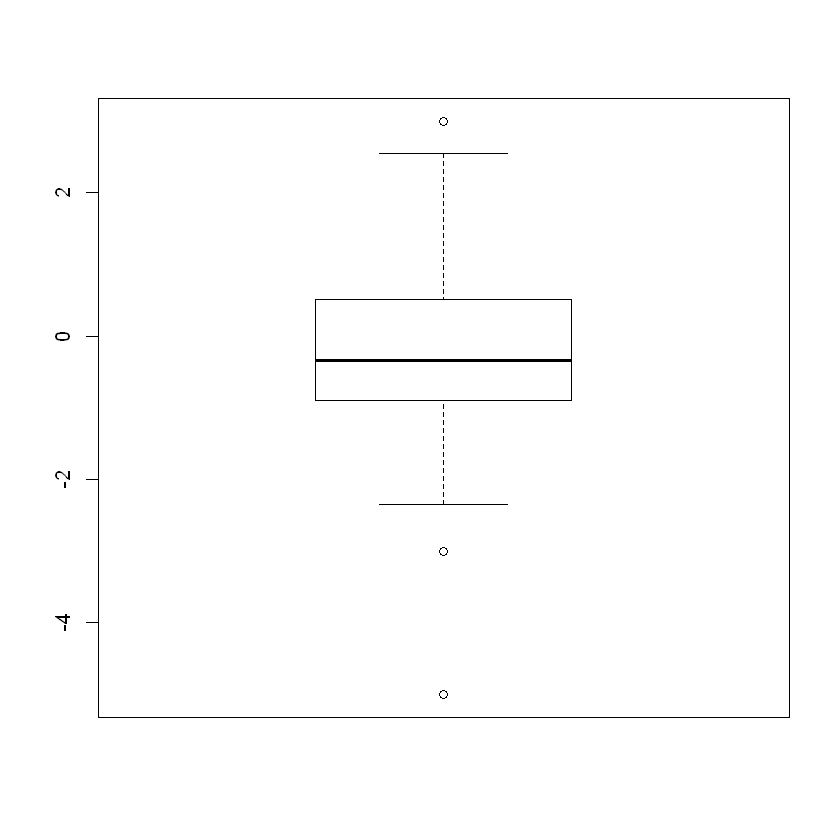

In [36]:
boxplot(x)

In [37]:
boxplot.stats(x)$out

[1] -3.0000 -5.0000  2.9999  2.9999

In [53]:
#multiple variance
y <-rnorm(100)
y<-c(y,runif(5,-1,1),-3,-5)

In [62]:
df<-data.frame(x,y)

In [63]:
boxplot.stats(y)$out

[1] -3.009426 -3.000000 -5.000000  3.912457  4.655109  3.447176  3.327171
[8]  4.523826

In [64]:
a<-which(x %in% boxplot.stats(x)$out)

In [65]:
b<-which(y %in% boxplot.stats(y)$out)

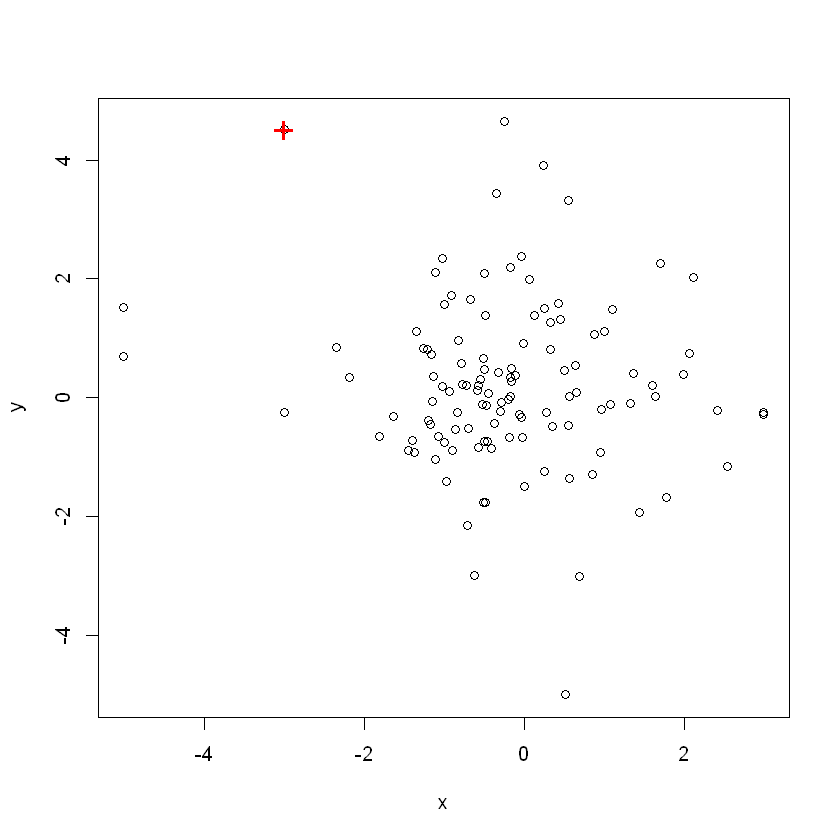

In [68]:
ab.outlier<-intersect(a,b)
plot(df)
points(df[ab.outlier,],col="red",pch="+",cex=2)

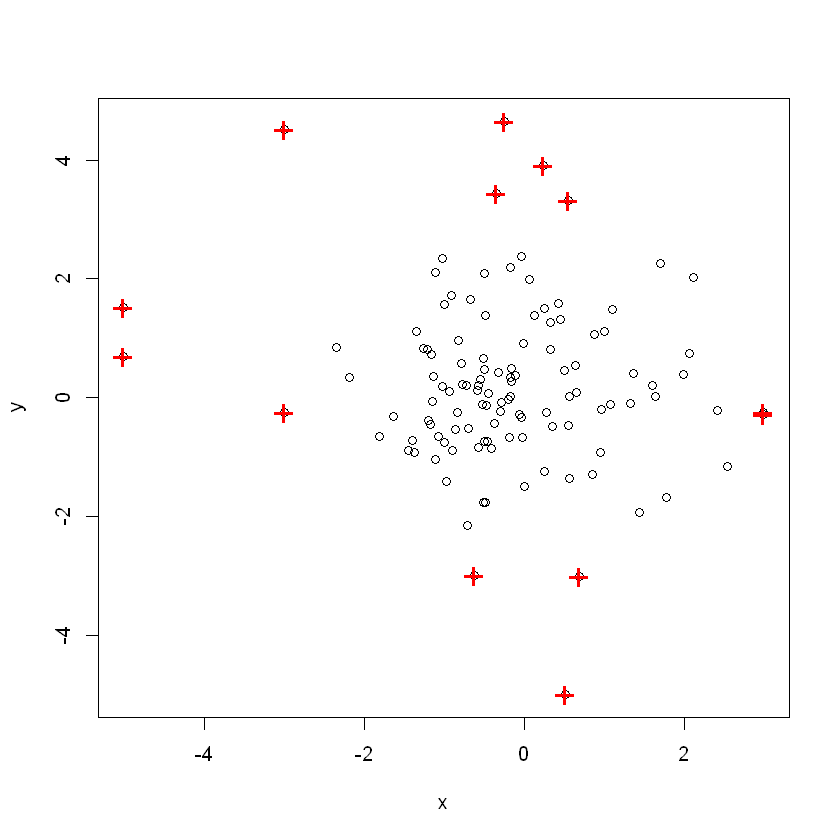

In [69]:
ab.outlier<-union(a,b)
plot(df)
points(df[ab.outlier,],col="red",pch="+",cex=2)

In [72]:
#local outlier factor (LOF)
library("DMwR")

Loading required package: lattice
Loading required package: grid


In [71]:
install.packages("DMwR")

Installing package into 'C:/Users/HL/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependencies 'TTR', 'xts', 'quantmod', 'ROCR'



package 'TTR' successfully unpacked and MD5 sums checked
package 'xts' successfully unpacked and MD5 sums checked
package 'quantmod' successfully unpacked and MD5 sums checked
package 'ROCR' successfully unpacked and MD5 sums checked
package 'DMwR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HL\AppData\Local\Temp\RtmpUHFtEF\downloaded_packages


In [74]:
iris2<-iris[-5]

In [75]:
outlier.score<-lofactor(iris2,k=5)

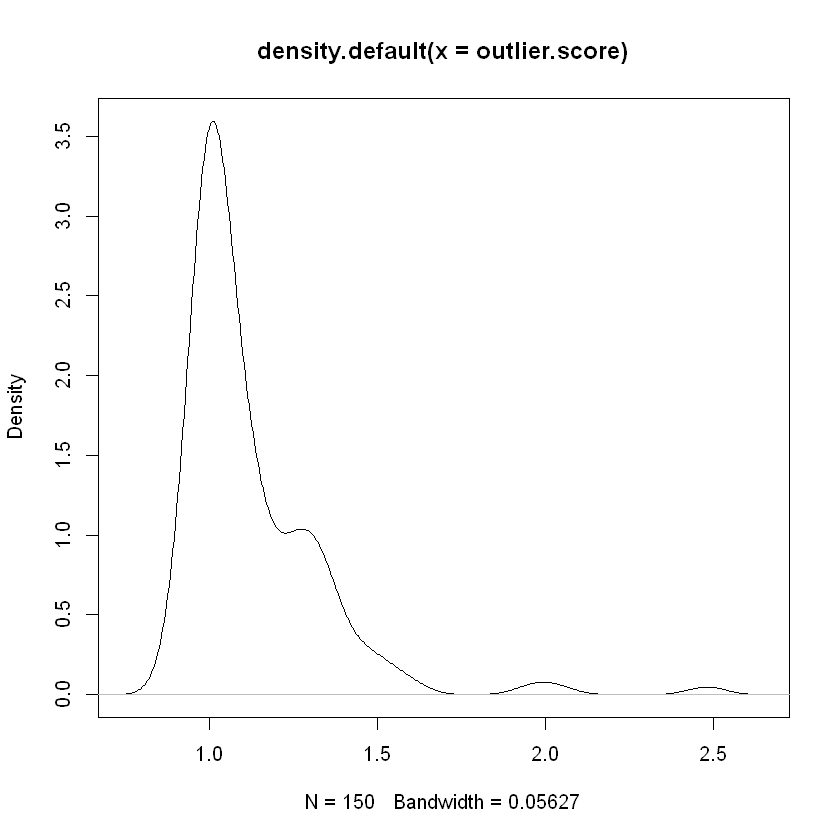

In [78]:
plot(density(outlier.score))

In [80]:
outliers<-order(outlier.score,decreasing=T)[1:5]

In [81]:
outliers

[1]  42 107  23 110  63

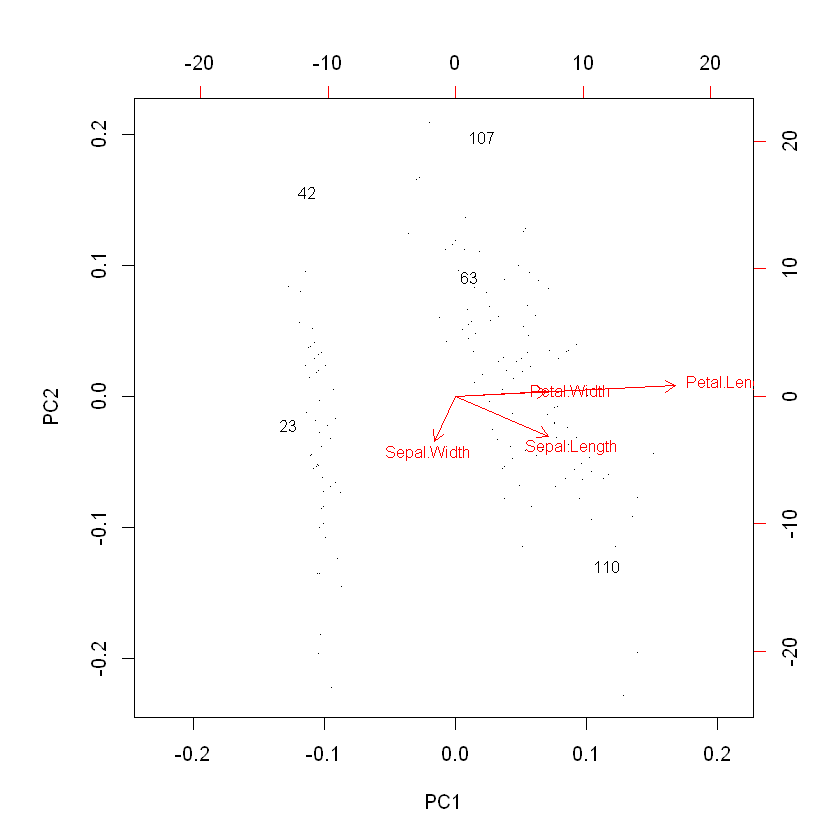

In [84]:
n<-nrow(iris2)
labels<-1:n
labels[-outliers]<- "."
biplot(prcomp(iris2),cex=.8,xlabs=labels)

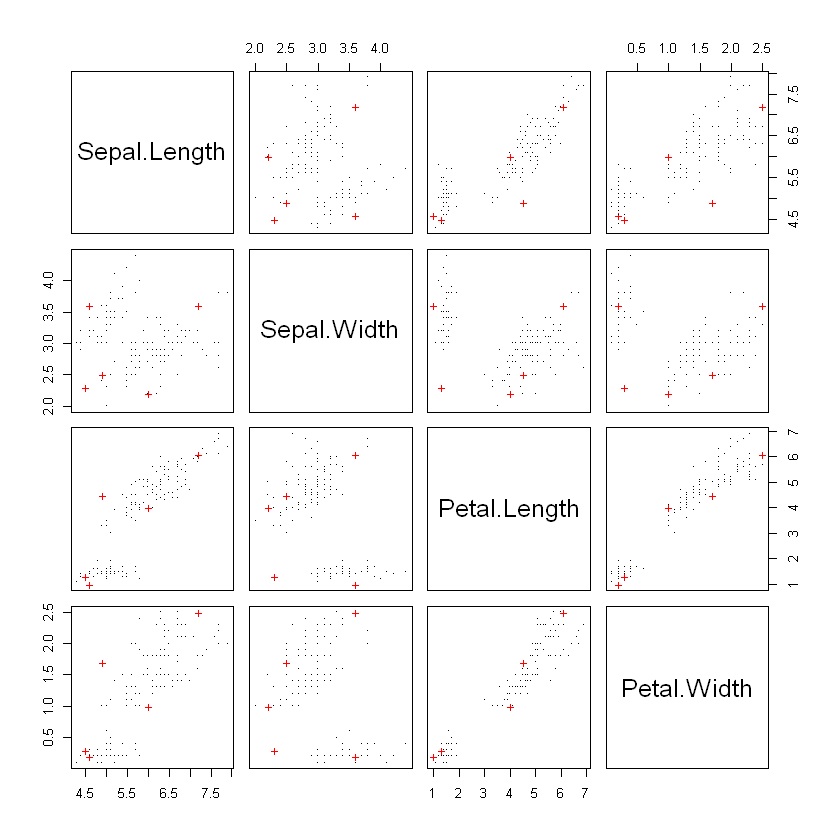

In [94]:
pch<-rep(".",n)
col<-rep("black",n)
pch[outliers] <- "+"
col[outliers]<- "red"
pairs(iris2,pch=pch,col=col)

In [98]:
library(Rlof)

Loading required package: doParallel
Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


In [99]:
outlier.scores<-lof(iris2,k=c(5:10))

In [119]:
order(outlier.scores[,1],decreasing=T)[1:5]
order(outlier.scores[,2],decreasing=T)[1:5]
order(outlier.scores[,3],decreasing=T)[1:5]
order(outlier.scores[,4],decreasing=T)[1:5]

[1]  42 107  23 110  63

[1]  42 107  23 110  99

[1]  42 107  23  25  61

[1]  42 107  23  16  61

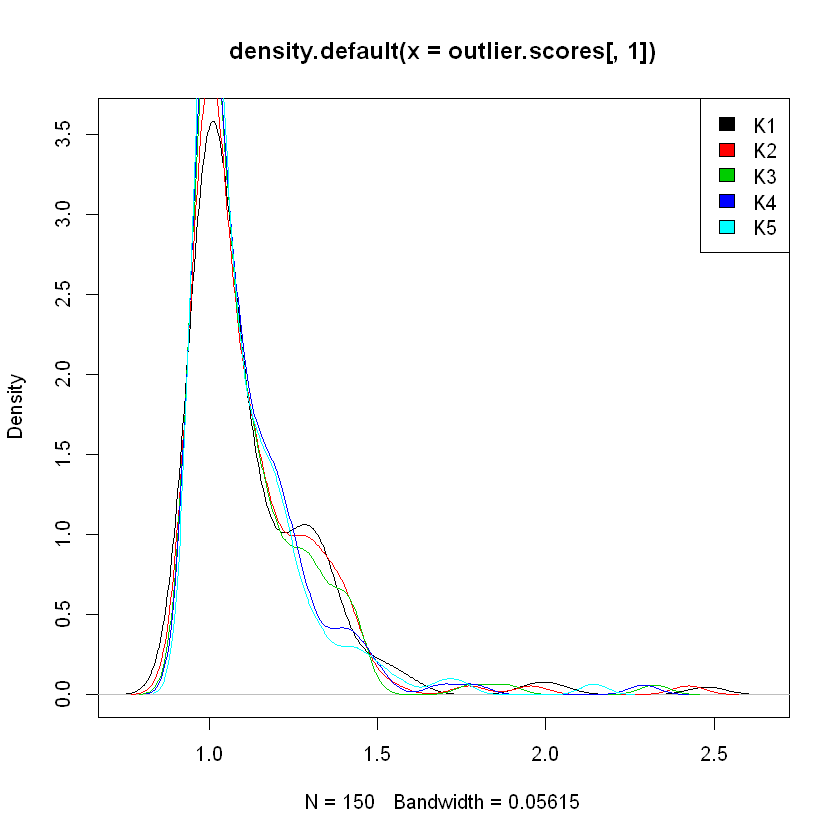

In [150]:
plot(density(outlier.scores[,1]),col=c(1))
lines(density(outlier.scores[,2]),col=c(2))
lines(density(outlier.scores[,3]),col=c(3))
lines(density(outlier.scores[,4]),col=c(4))
lines(density(outlier.scores[,5]),col=c(5))
legend("topright",c("K1","K2","K3","K4","K5"),fill=c(1:5))

In [152]:
#use clustering to identify outliers
kmeans.result<-kmeans(iris2,centers=3)

In [155]:
kmeans.result

K-means clustering with 3 clusters of sizes 50, 38, 62

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.006000    3.428000     1.462000    0.246000
2     6.850000    3.073684     5.742105    2.071053
3     5.901613    2.748387     4.393548    1.433871

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
[112] 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 2 3 2
[149] 2 3

Within cluster sum of squares by cluster:
[1] 15.15100 23.87947 39.82097
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [156]:
centers<-kmeans.result$centers[kmeans.result$cluster,]

In [171]:
distance<-sqrt(rowSums((iris2-centers)^2))

In [178]:
outlier<-order(distance,decreasing=T)[1:5]
iris2[outlier,]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
99,5.1,2.5,3.0,1.1
58,4.9,2.4,3.3,1.0
94,5.0,2.3,3.3,1.0
61,5.0,2.0,3.5,1.0
119,7.7,2.6,6.9,2.3


In [23]:
f<-stl(AirPassengers,"periodic",robust=T)

In [28]:
outliers<-which(f$weights<1e-8)

In [98]:
op <- par(mar=c(0,4,0,3),oma=c(5,0,4,0),mfcol=c(4,1))

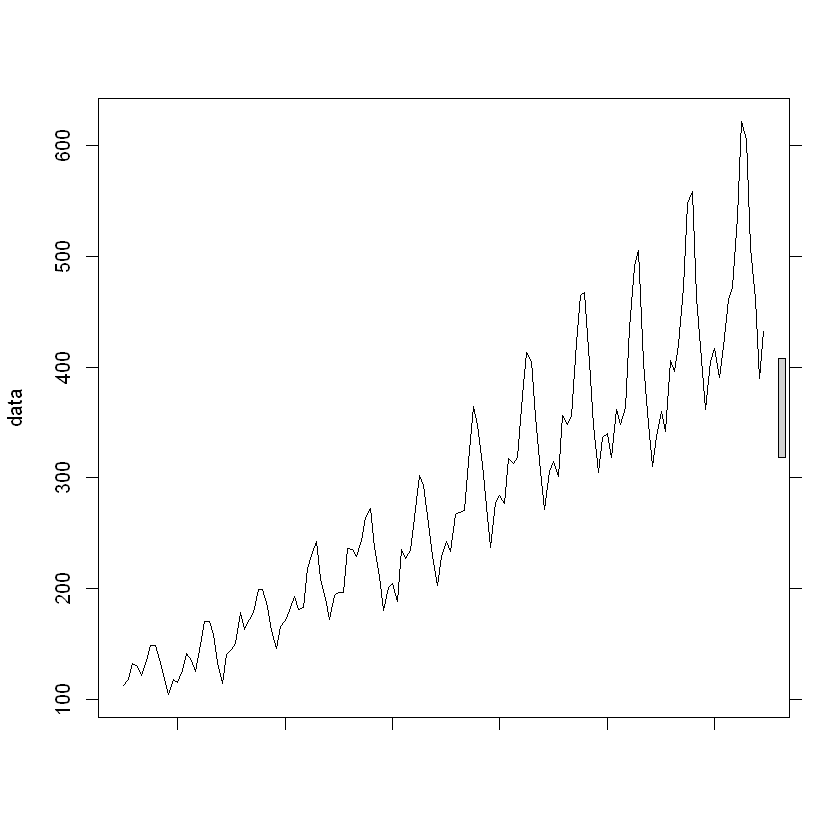

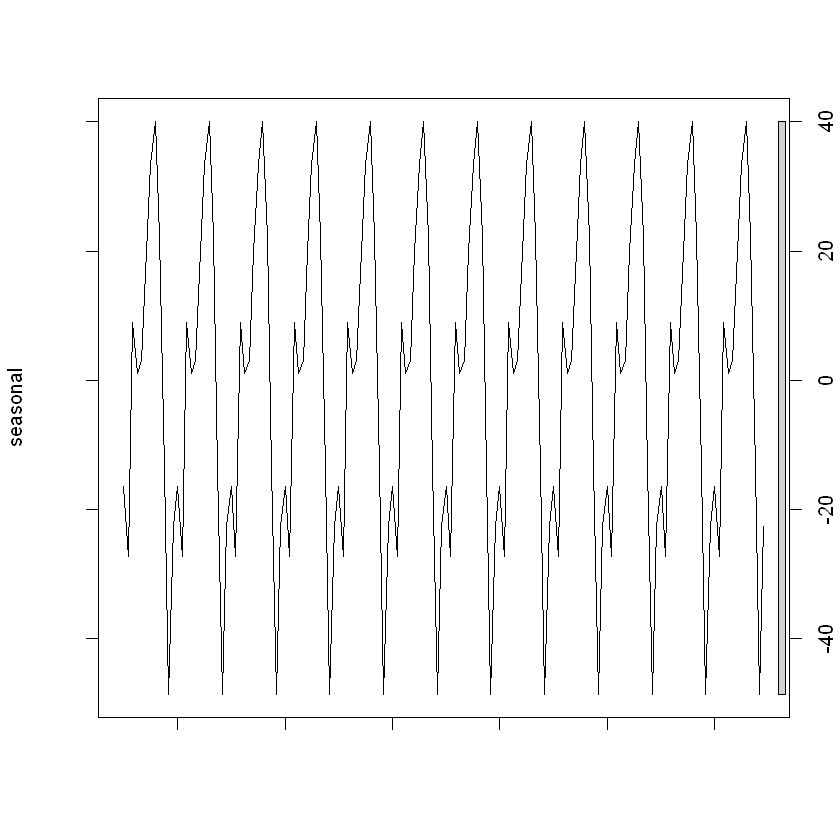

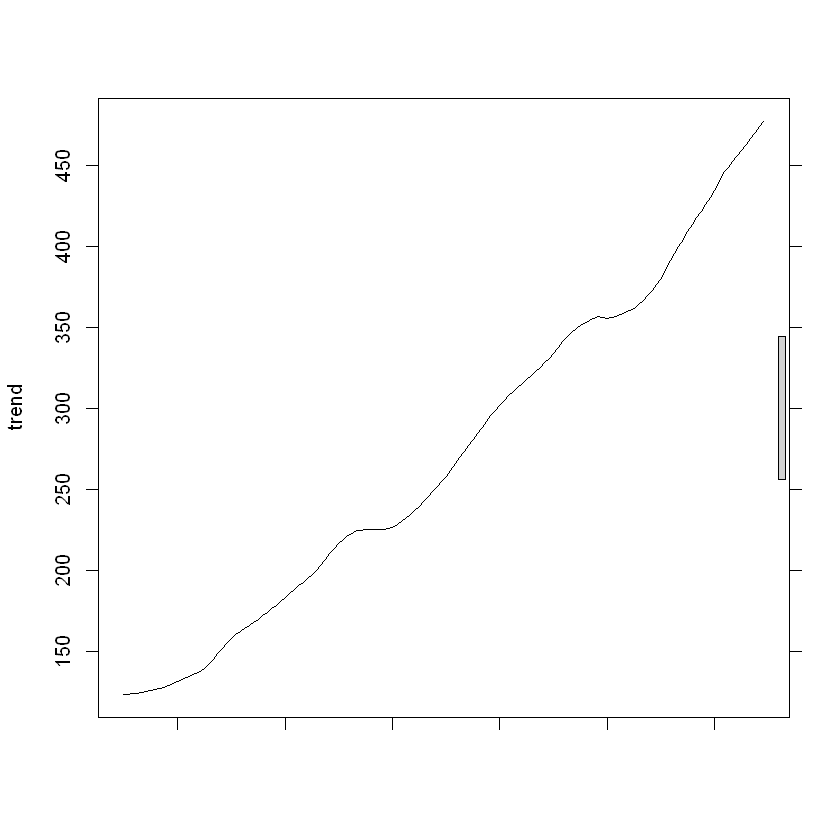

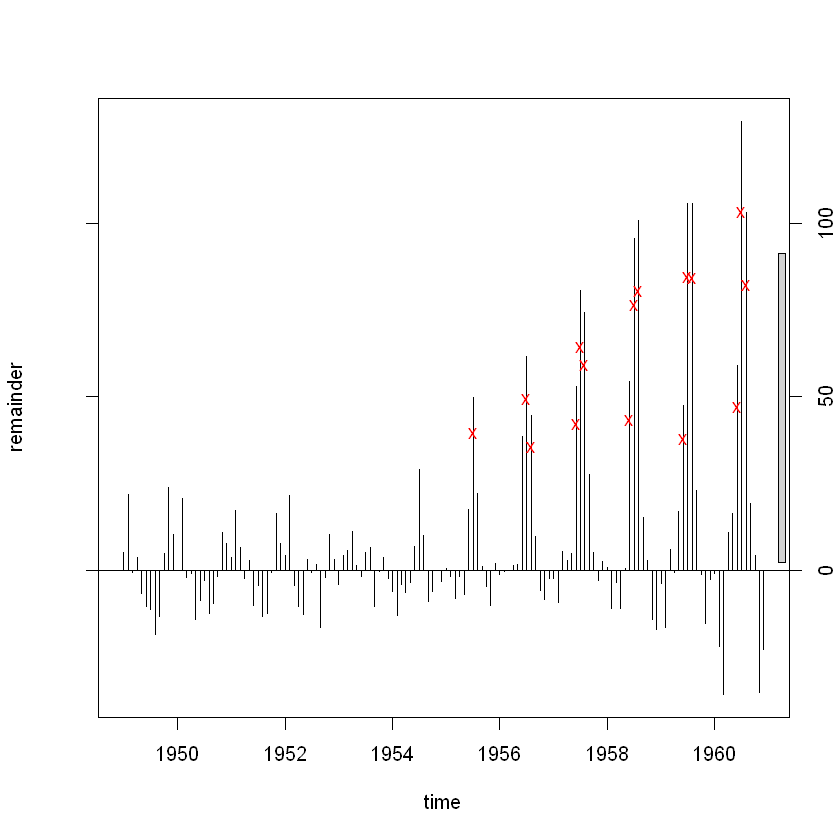

In [99]:
str<-f$time.series
plot(f,set.pars=NULL)
points(time(str)[outliers],0.8*str[,"remainder"][outliers],pch="x",col="red")
par(op)

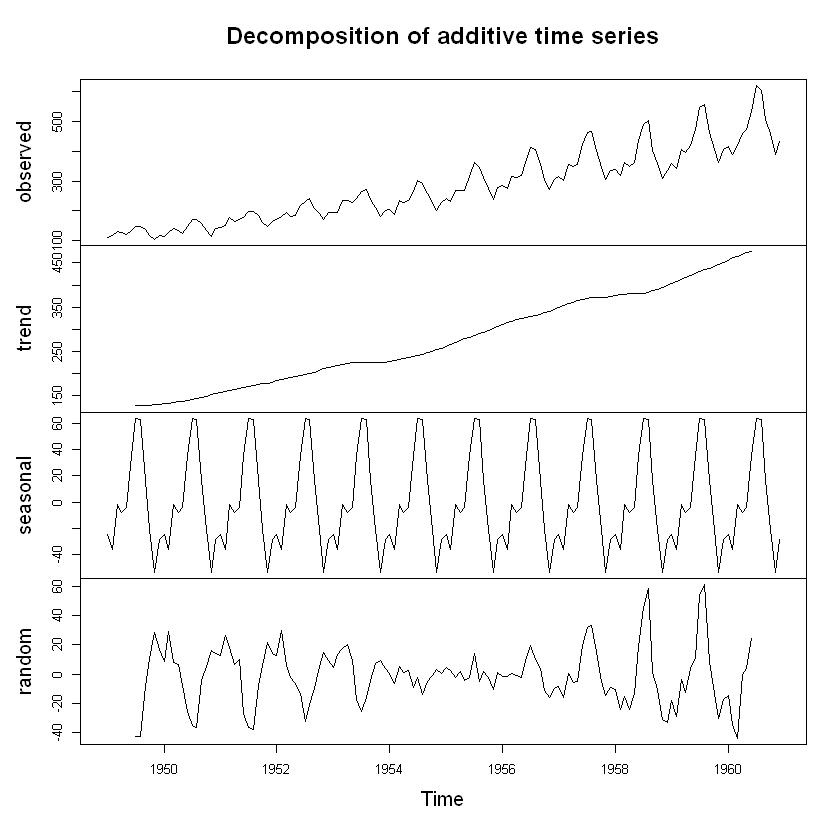

In [58]:
f2<-decompose(AirPassengers)
plot(f2)